<a href= "http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml">
    <img src ="../data/NY_Taxi.png" height = "300px" width = "300px" align="right"/>
</a>
# <center> Exploratory Data Analysis on Green Taxis </center>


This notebook is an analysis on the data collected by the New York City Taxi and Limousine commission about <strong> "Green" </strong> Taxis. Green Taxis (as opposed to yellow ones) are taxis that are not allowed to pick up passengers inside of the densely populated areas of Manhattan

The analysis is on the September 2015 dataset. Link to download dataset can be found [here](https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-09.csv)

Let's start the analysis by importing the necessary python modules for assitance.

## Importing libraries for analysis

<strong>Note: </strong> Be sure to install these python libraries before importing from PyPI using pip. General command for downloading and installing 'requests' library (for e.g) would be:

```shell
$ pip install requests
```

In [1]:
import requests # required to download csv file from the URL
import pandas as pd # used for data analysis
from six.moves.urllib.request import urlretrieve # used for csv file download
import os # to check for already existing file on the disk
import matplotlib.pyplot as plt # used for plotting histograms and graph
import matplotlib # used for plotting
from sklearn.linear_model import LinearRegression # used for tip_percentage prediction
from sklearn.neural_network import MLPRegressor # used for building neural network model
from sklearn.ensemble import RandomForestRegressor # used for building random-forest model
from sklearn import metrics # use to calculate the accuracy metrics
import numpy as np # used for mathematical calculation .e.g sqrt
import re # for parsing function name from function

## Global Variables

Defining some global variables to be used in the code. This technique of centralized decleration for all the variables provides the flexibility of code modulation in future. Also, following philosophy of no-harcoded value in the main code.

In [2]:
CSV_DATA_URL = "https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-09.csv"
DEST_FILENAME = "../data/green.csv"
X_LABEL_HIST = "Distance covered by Green Taxis(miles)"    
Y_LABEL_HIST = "Number of Trips"
TITLE_HIST   = "Histogram of Trip_distance by Green Taxis"
PICKUP_TIME_COLUMN = "lpep_pickup_datetime"
TRIP_DISTANCE_COLUMN = "Trip_distance"
MEAN_TRIP_DISTANCE_BY_HOUR  = "meanTripDistByHour"
MEDIAN_TRIP_DISTANCE_BY_HOUR = "medianTripDistByHour"
TITLE_MEAN_MEDIAN= "Mean v/s Median Trip_distance grouped by hour"
XLabel_MEAN_MEDIAN = "HOURS"
YLabel_MEAN_MEDIAN = "Trip Distance (miles)"
RateCodeID = "RateCodeID"
FAIR_AMOUNT = "Fare_amount"
TIP_AMOUNT = "Tip_amount"
TOTAL_AMOUNT = "Total_amount"
TIP_PERCENTAGE = "Tip_percentage"

## Downloading the data

Downloading the csv file related to green taxis information from amazon S3. Be sure to check for working internet connection before running the below cell.

In [3]:
def downloadData(CSV_DATA_URL, DEST_FILENAME):
    """
    Function to download the file from the internet and save on to the disk
    
    :param CSV_DATA_URL  : URL of CSV file we want to download
    :param dest_filename : Destination path to save the downloaded file on to disk
    :return              : None
    """
    if not os.path.exists(DEST_FILENAME):
        print ("Downloading file. . .")
        filename, _ = urlretrieve(CSV_DATA_URL, DEST_FILENAME)
        print ("Download Complete. File at {0}".format(DEST_FILENAME))
    else: 
        print ("File already present at {0}".format(DEST_FILENAME))

# calling the downloadData function
downloadData(CSV_DATA_URL, DEST_FILENAME)

# Reading csv file into pandas dataFrame
df = pd.read_csv(DEST_FILENAME)
df2 = df.copy() # to be used in Q5
print ("\nSample of the data : ")
df.head()

File already present at ../data/green.csv

Sample of the data : 


,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0


After having loaded the csv file on to memory as pandas dataframe, let us proceed to further analysis of the dataset

## 1) No. of rows and columns in the dataset

In [4]:
print ("Dataset contains : {0} number of rows and {1} number of columns".format(len(df), len(df.columns)))

Dataset contains : 1494926 number of rows and 21 number of columns


## 2) Analysis of Trip_distance by green taxis

Let us start with exploration of the summary of 'Trip_distance' column, i.e. the trips mean distance, max distance, and quartiles. This will give us the idea about the distibution pattern the data is following

In [5]:
# get the mean, standard_deviation, max and quartiles about the Trip_distance made by green taxis
print ("Trip_distance metrics : ")
df[TRIP_DISTANCE_COLUMN].describe()

Trip_distance metrics : 


count    1.494926e+06
mean     2.968141e+00
std      3.076621e+00
min      0.000000e+00
25%      1.100000e+00
50%      1.980000e+00
75%      3.740000e+00
max      6.031000e+02
Name: Trip_distance, dtype: float64

The above statistical exploration suggests that out of $1,494,926$ trips made by the green taxis, majority made short trips: average distance per trip, $\mu $ being $ = 2.97 $ miles. However we also have a taxi that made a trip for $603$ miles (Wao! thats a lot. May be it was going out of state, or may be reading meter was damaged. This needs further analysis). This outlier point might distort our histogram we propose to build.

The standard deviation value, $ \sigma = 3.07$ miles suggests that, the data might be skewed (or it may also be because of the outlier point in our data. Needs data cleaning and further analysis)

Let us plot the <strong> histogram of Trip_distance</strong> to get the better idea. We will use the logScale for plotting because of disparate Trip_distance by green taxis

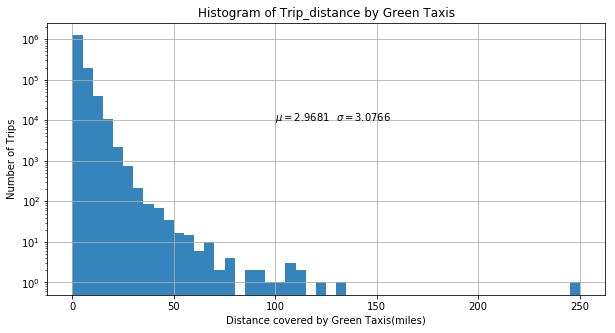

In [6]:
%matplotlib inline
def plotHist(trip_distance, xlabel, ylabel, title, showMu=True):
    """
    Function to plot histogram of Trip_distance by green taxis
    
    :param trip_distance : A pandas series of float values
    :param xlabel        : String. xlabel for the plot
    :param ylabel        : String. ylabel for the plot
    :param title         : String. This variable sets the title of the plot
    :param showMu        : Boolean. This tells the function whether to show mean value on the plot or not.
    :return              : None
    """    
    mean = "%.4f"%trip_distance.mean()
    std_dev = "%.4f"%trip_distance.std()
    plt.figure(figsize=(10,5))
    plt.yscale("log")
    plt.xlabel("{0}".format(xlabel))
    plt.ylabel("{0}".format(ylabel))
    plt.title("{0}".format(title))
    plt.hist(trip_distance, 50, alpha = 0.9,range=(0,250))
    if showMu:
        plt.text(100, 10**4, r'$\mu = {0}$'.format(mean))
        plt.text(130, 10**4, r'$\sigma = {0}$'.format(std_dev))
    plt.grid(True)
    plt.show()
    
plotHist(df[TRIP_DISTANCE_COLUMN], X_LABEL_HIST, Y_LABEL_HIST, TITLE_HIST)

Our assumption was correct. The data is skewed. Its skewed towards right. This suggests that <strong>commuters tends to hire taxis for wide range of distances</strong>. There are exceptions when taxis make trip for distance > 200 miles. 

The varied range of distance trip by the green taxi in new york might be because:

* Short Distances (0-10 miles)  : Commuters are commuting to their offices or the nearest metro station or friends/relative's home or even to various landmarks (New York being cultural capital of the world)
* Long Distances (10-100 miles) : Commuters are commuting to get away places in New Jersey or hiking places near to  NYC. The relative less no. of long distance trips compared to short ones may also be attributed to the fact the people prefer metros/buses/private transport for commuting than taxis.

The histogram of Trip_distance does give us a brief idea of how commuters are using Green Taxis for commute. We also made some interesting hypothesis. To dig deeper and find out how much of it is true, let us analyze Trip_distance grouped by hour of the day and how many of the trips end up at Airport

## 3) Trip_distance by the hour of the day

In [7]:
def getTripDistByHour(df, timeColumn, targetColumn):
    """
    Function computes and return the mean and median of Trip_distance grouped by the hour
    
    :param df          : pandas dataframe
    :param timeColumn  : String. Column name of dataframe which contains date-time value. May be string type or
                         Datetime time
    :param targetColumn: String. Trip_distance column name in dataFrame
    :return            : panda Series of mean and median of targetColumn grouped by hour of timeColumn
    """
    timeStampColumn = pd.DatetimeIndex(df[timeColumn])
    meanGrp = df.groupby([timeStampColumn.hour])[targetColumn].mean()
    medianGrp = df.groupby([timeStampColumn.hour])[targetColumn].median()
    
    return meanGrp, medianGrp

meanGrp, medianGrp = getTripDistByHour(df, PICKUP_TIME_COLUMN, TRIP_DISTANCE_COLUMN)

The function returned us the mean and median Trip_distances by the green taxi grouped by the day. 

Let us have a look at them side by side for better comparision

In [8]:
def getCombinedMeanMedianTripDist(meanGrp, medianGrp):
    """
    Function displays the value of meanGrp and medianGrp onto screen side by side
    :param meanGrp  : panda Series. Series of mean Trip_distance grouped by hour
    :param medianGrp: panda Series. Series of median Trip_distance grouped by hour
    :return         : panda dataframe : A dataframe with meanGrp and medianGrp as its column
    """    
    dfMeanMedian = pd.DataFrame()
    dfMeanMedian[MEAN_TRIP_DISTANCE_BY_HOUR] = meanGrp
    dfMeanMedian[MEDIAN_TRIP_DISTANCE_BY_HOUR] = medianGrp
    dfMeanMedian.reset_index(inplace=True)
    dfMeanMedian.drop(PICKUP_TIME_COLUMN, axis = 1, inplace=True)
    return dfMeanMedian

print ("Mean and Median Trip_distances for the green taxi grouped by the hour: ")
dfCombinedMeanMedian = getCombinedMeanMedianTripDist(meanGrp, medianGrp)
dfCombinedMeanMedian

Mean and Median Trip_distances for the green taxi grouped by the hour: 


,meanTripDistByHour,medianTripDistByHour
0,3.115276,2.20
1,3.017347,2.12
2,3.046176,2.14
3,3.212945,2.20
4,3.526555,2.36
5,4.133474,2.90
6,4.055149,2.84
7,3.284394,2.17
8,3.048450,1.98
9,2.999105,1.96


The above dataframe shows there seems to be a spike in average and median Trip_distance during 5-6 am. For a better look, lets plot the mean and median values below : 

Plot of Trip_distance for rides for green taxis : 


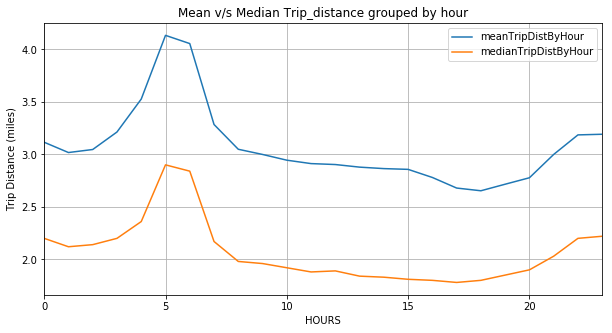

In [9]:
#plotting dataFrame
def plotMeanMedianDF(dfCombinedMeanMedian, title, xlabel, ylabel):
    """
    Function plots df
    :param dfCombinedMeanMedian : pandas dataFrame
    :param title : String. Title for the plot
    :param xlabel: String. xlabel for the plot
    :param ylabel: String. ylabel for the plot
    :return      : None
    """
    plot = dfCombinedMeanMedian.plot(figsize=(10,5), title=title,grid=True)
    plot.set_xlabel(xlabel)
    plot.set_ylabel(ylabel)
    plt.show()

print("Plot of Trip_distance for rides for green taxis : ")    
plotMeanMedianDF(dfCombinedMeanMedian, TITLE_MEAN_MEDIAN, XLabel_MEAN_MEDIAN, YLabel_MEAN_MEDIAN)

The median tends to follow the mean Trip_distance and there is for sure a spike in distance travelled by green taxis duing morning. One of the reasons can be people travelling to the offices to start their day or people travelling from airport to their home and offices.

To check our hypothesis related to Trip_distance from Airports during 5-6 am, lets analyze the data for the trip made from JFK (one of the world bussiest airport)

The 'RateCodeID' of '2' in out dataFrame will help provide us the information for trips related to JFK. Let us have a look.

## 3b) Rides To-From JFK Airport

Plot of Trip_distance for rides related to JFK


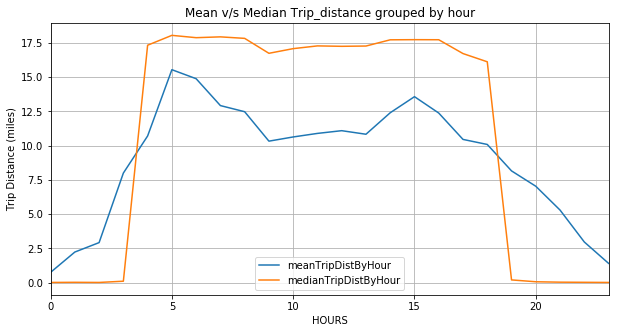

In [10]:
# Extracting information for rides related to JFK
dfAirport = df[df[RateCodeID]==2]
meanGrpFiltered, medianGrpFiltered = getTripDistByHour(dfAirport, PICKUP_TIME_COLUMN, TRIP_DISTANCE_COLUMN)
dfCombinedMeanMedianFiltered = getCombinedMeanMedianTripDist(meanGrpFiltered, medianGrpFiltered)
print("Plot of Trip_distance for rides related to JFK")
plotMeanMedianDF(dfCombinedMeanMedianFiltered, TITLE_MEAN_MEDIAN, XLabel_MEAN_MEDIAN, YLabel_MEAN_MEDIAN)

Aha ! The above plot depicting Trip_distance related to JFK shows increases in rides from 4am - 6pm with the highest being at 5 am in the morning. This might approve of our hypothesis that, it is because of the folks travelling to-from JFK in the morning (5 am - 6am) that total Trip_distance by green taxis surges.

* Interesting Point : Trip_distance related to JFK around 12:00 am in the morning are very low. It might suggest that the density of flight landing and taking off from JFK is low during this period. This may also be incorrect because we are only looking at data for Sept 2015 which might cause a bias in the result. A deeper analysis is needed. Inspite of this, its an interesting point to note.

Let us also look at the NUMBER of these trips related to JFK. Is this number that great to affect the overall increase in Trip_distance during 5 am - 6 am ?

In [11]:
print("No. of rides originating or terminating at JFK : {0}".format(len(dfAirport)))

No. of rides originating or terminating at JFK : 4435


<strong> 4435 </strong> number of rides related to JFK does not seem to be that great to affect the total increase in Trip_distance. That means, there are other factors that is making the Trip_distance increase during 5 am - 6 am.

Let us also take a look at the average fair generated from the trips related to JFK and compare them with trips not related to JFK

In [12]:
def avgFair(dfAirport, dfNonAirport):
    """
    Function calculates the avg fair for trips related to one of NYC area airports - JFK and compares it with rides
    not related to JFK.
    
    :param dfAirport : pandas dataframe. Contains records for rides related to JFK
    :param dfNonAirport: pandas dataframe. Contains records for rides not related to JFK
    :return          : None
    """        
    dfMean = dfAirport[FAIR_AMOUNT].mean()
    dfNonMean = dfNonAirport[FAIR_AMOUNT].mean()
    print ("Average fair for rides related to JFK : ${0} whereas \navergae fair for rides not related to JFK : ${1}".format(dfMean, dfNonMean))
    
# Slicing df DataFrame for values where df[RateCodeId] != 2
dfNonAirport = df.loc[df[RateCodeID]!=2]

# comparing avgFair for rides related to JFK and rides not related to JFK
avgFair(dfAirport, dfNonAirport)

Average fair for rides related to JFK : $49.021871476888386 whereas 
avergae fair for rides not related to JFK : $12.434654144171278


As clearly shown in above computation, avg. fair for rides related to JFK is much greater than for rides non-related to JFK. This is obvious considering the fact that avg distance covered by rides related to JFK is $10.25$ miles as compared to $2.95$ miles for rides non-related to JFK

* Interesting Fact : The airport commuters also tend to tip bigger as compared to riders non-related to airport trips by 234% more

<strong> Now, </strong> all these analysis are interesting, but wouldn't it be nicer, if we are able to predict something like tip_amount (as a percentage of total_fair) beforehand. 

I think we can. Python provide us with some powerful libraries like scikit-learn to acheive the feat. Let's see how to do that in the below section : 

## 4) Predictive model for tip as a percentage of total_fair

But before we predict tip as a percentage of total_fair, there are a couple of things that need to be done:

* Create a variable for tip as a percentage of the total fair
* Perform data cleaning of the dataset : a) Remove NA values b) Remove columns not assisting in prediction
* Sample the data into training and testing set
* Build machine learning model
* Now, predict

### Variable Creation

Let us start with creation of the variable : 

In [13]:
# storing tip as a percentage of total amount into new column in the dataframe
df[TIP_PERCENTAGE] = df[TIP_AMOUNT]/df[TOTAL_AMOUNT]

print ("Sample new dataset : ")
df.head()

Sample new dataset : 


,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,Tip_percentage
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0,0.200000
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0,0.000000
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0,0.086207
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0,0.000000
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0,0.000000


### Data Cleaning

Now, let us remove columns that we think would not help in the analysis. Some of the columns straight away are:
* VendorID
* lpep_pickup_datetime
* Lpep_dropoff_datetime
* Pickup_longitude
* Pickup_latitude
* Store_and_fwd_flag
* Dropoff_longitude
* Dropoff_latitude
* Total_amount
* Tip_amount
* Ehail_fee

However, after continous iteration and selection of features by hit-and-trial, I concluded that two features : 
* Trip_distance
* Fare_amount

gives me the best prediction result. So, I now remove every column from the dataset except the above 2.
 
Also, let's remove dataset entries with Fair_amount < 0.

And, lets remove all rows with NA values. We have more than 1 Million rows, therefore we should not worry much about the reduction in dataset because of removing of these values

In [14]:
# Removing un-necessary columns from the dataframe
# df.drop(labels = ["lpep_pickup_datetime", "Lpep_dropoff_datetime", "VendorID", "Pickup_longitude", 
#                   "Pickup_latitude", "Store_and_fwd_flag", "Dropoff_longitude", "Dropoff_latitude", "Total_amount", 
#                   "Tip_amount", "Ehail_fee"], axis = 1, inplace=True)

df = df[['Trip_distance', 'Fare_amount', 'Tip_percentage']]

# removing entries with Fair_amount <0
df = df[df[FAIR_AMOUNT]>=0]

# lets drop rows with NA values
df.dropna(inplace = True)

# cleaned dataset : 
print ("Cleaned Dataset : ")
df.head()

Cleaned Dataset : 


,Trip_distance,Fare_amount,Tip_percentage
0,0.00,7.8,0.200000
1,0.00,45.0,0.000000
2,0.59,4.0,0.086207
3,0.74,5.0,0.000000
4,0.61,5.0,0.000000


### Scaling the dataset

Normalizing the dataset for better prediction. For normalization, I am dividing each column in the dataset by their maximum value.

Also, the boxplot of the new dataset is constructed to understand the inner structure of the data

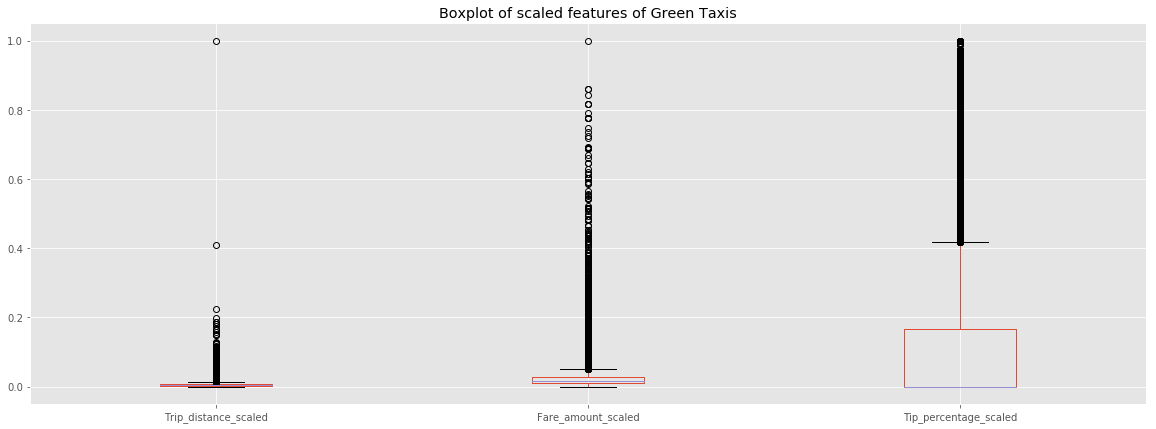

In [15]:
matplotlib.style.use('ggplot')
column_names = df.columns.values
column_names_new=df.columns.values+"_scaled"
for i in range(0,len(column_names)):
    df[column_names_new[i]]=df.iloc[:,i]/max(df.iloc[:,i])
    
df=df.iloc[:,len(column_names):]
plt.figure(figsize=(20,7))
plt.title("Boxplot of scaled features of Green Taxis")
df.boxplot()
plt.show()

The boxplot depicts that there exists a lot of outliers (some anomoly too, like Fare_amount going negetive etc.) in the dataset. We cant remove every of them. So, for now let us keep them and later while iterating over the model, we can remove these to improve the prediction of the model

### Sampling the Data

Let us now sample the data into training and testing data.

In [16]:
# Sample train and test data : we are using 80% of the dataset as training data
predictors = df[df.columns[:-1]]
classes = df[df.columns[-1:]]

training_set_size = int(len(df) * 0.8)
test_set_size = len(df) - training_set_size

training_predictors = predictors[:training_set_size]
training_classes = classes[:training_set_size]
test_predictors = predictors[training_set_size:]
test_classes = classes[training_set_size:]

training_predictors.head()
# training_classes.head()

,Trip_distance_scaled,Fare_amount_scaled
0,0.000000,0.013437
1,0.000000,0.077519
2,0.000978,0.006891
3,0.001227,0.008613
4,0.001011,0.008613


### Defining functions to perform analysis

In [17]:
# Use passed function to build the model and train on the dataset
def buildModel(function):
    model=function.fit(training_predictors.as_matrix(), training_classes.as_matrix()[:,0])
    return model

# Predict on the test data using model created above
def makePrediction(function):
    predicted=function.predict(test_predictors.as_matrix())
    return predicted

# Calculate the accuracy achieved
def calcAccuracy(function,predicted):
    MSE=metrics.mean_squared_error(test_classes, predicted, sample_weight=None, multioutput='uniform_average')
    print("Mean squared error: ",MSE)
    R2=1-metrics.r2_score(test_classes, predicted, sample_weight=None, multioutput=None)
    RMSE=np.sqrt(MSE)
    print("R squared value: ",R2)
    print("Root Mean Squared Error: ",RMSE)
    print ("Mean Absolute Percentage Error : ",helper_meanAbsolutePercentageError(predicted)) 
    return MSE, R2, RMSE, helper_meanAbsolutePercentageError(predicted)

def helper_meanAbsolutePercentageError(predicted): 
    return np.mean(np.abs((test_classes.as_matrix()[:,0] - predicted) / (10**(0)+test_classes.as_matrix()[:,0]))) * 100

# Plot the  outputs
def plotOutput(function,predicted):
    plt.figure(figsize=(20,7))
    plt.plot(pd.Series(range(0,len(test_classes.as_matrix()[:,0]))),test_classes.as_matrix()[:,0],
             color='red',label='Test Data',linewidth=2)
    plt.plot(pd.Series(range(0,len(test_classes.as_matrix()[:,0]))), 
             predicted, color='blue',
            linewidth=2,label="Predicted Data")
    plt.xlabel("Data Points")
    plt.ylabel("Scaled Index Value")
    plt.legend(loc='upper left')
    pattern = r"[a-zA-Z]*"
    k = re.match(pattern, str(function))
    plt.title("Tip_percentage prediction using " + k.group()+ " model")
    plt.show()

# Calling above functions sequentially
def runAnalysis(function):
    model=buildModel(function)
    predicted=makePrediction(function)
    MSE, R2, RMSE, MAPE = calcAccuracy(function,predicted)
    plotOutput(function,predicted)
    return MSE, R2, RMSE, MAPE

### Prediction using various models

Mean squared error:  0.00788541234144
R squared value:  0.994504037786
Root Mean Squared Error:  0.0887998442647
Mean Absolute Percentage Error :  7.27798058955


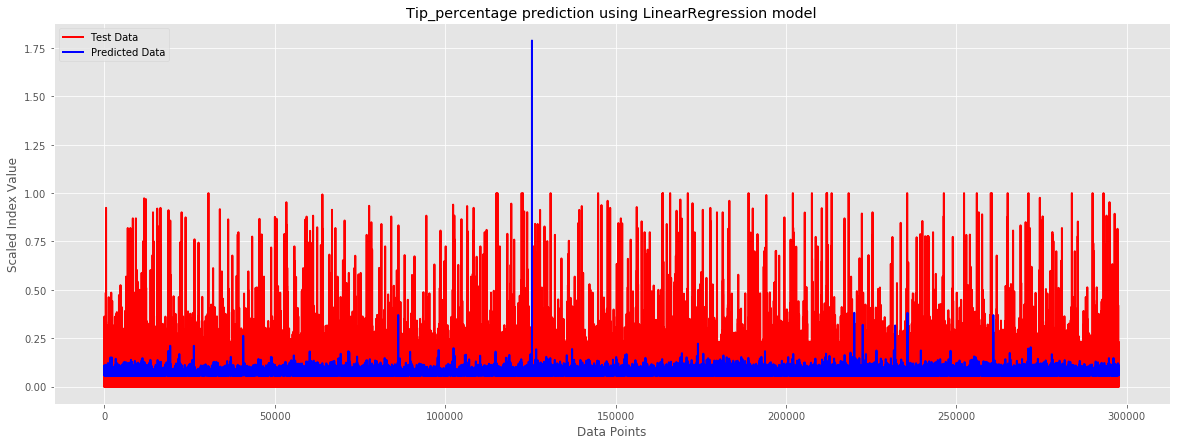

In [18]:
# Using Linear_regression model from scikit-learn to predict the Tip_percentage
regr = LinearRegression()
(MSE_L, R2_L, RMSE_L, MAPE_L)=runAnalysis(regr)

We can see, that although we have achieved high accuracy (R squarred value = 0.99), still the prediction of Tip_percentage is not that great. 

I believe better scaling methods (including normalization) and feature choosing can help improve the result.

Mean squared error:  0.00787931111436
R squared value:  0.99373455425
Root Mean Squared Error:  0.0887654838006
Mean Absolute Percentage Error :  7.25676204148


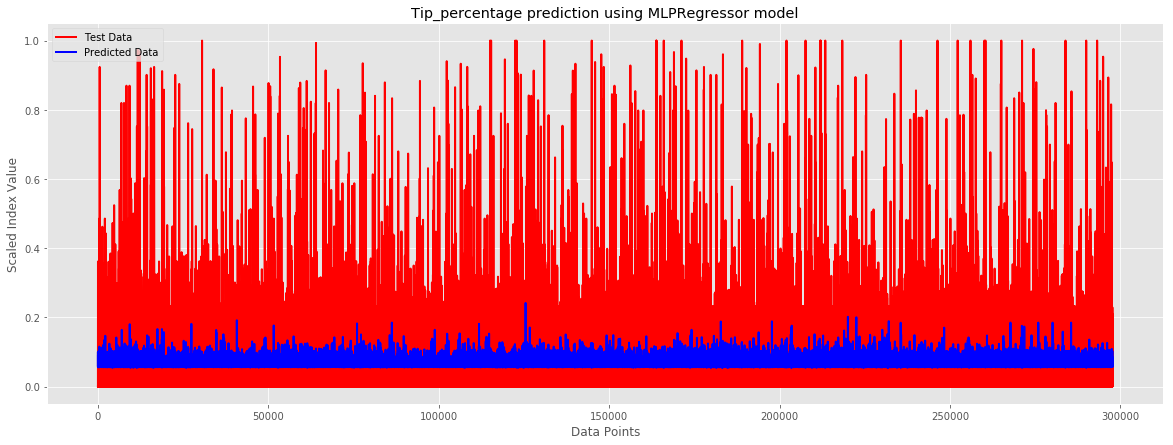

In [19]:
# Using MLPRegressor model from scikit-learn to predict the Tip_percentage
mlpr = MLPRegressor(solver='adam',alpha=1e-5,
                     hidden_layer_sizes=(2, ), random_state=1,activation='logistic',max_iter=200)
(MSE_N, R2_N, RMSE_N, MAPE_N)=runAnalysis(mlpr)

Mean squared error:  0.00797409055081
R squared value:  1.00568808669
Root Mean Squared Error:  0.0892977634144
Mean Absolute Percentage Error :  7.20760271531


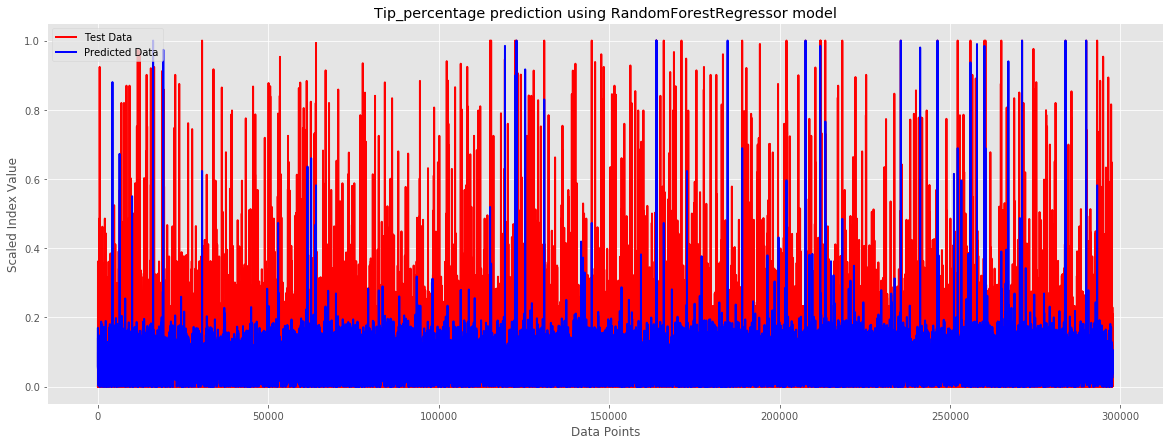

In [20]:
# Using RandomForestRegressor model from scikit-learn to predict the Tip_percentage
rfr = RandomForestRegressor(n_estimators=100)
(MSE_R, R2_R, RMSE_R, MAPE_R)=runAnalysis(rfr)

### Choosing the best model among all three

In [21]:
def CompreModel(MSE_L, R2_L, RMSE_L, MAPE_L, MSE_N, R2_N, RMSE_N, MAPE_N, MSE_R, R2_R, RMSE_R, MAPE_R):
    column=["MeanSquaredError", "RSquared", "RootMeanSquaredError", 
                                 "MeanAbsolutePercentageError"]
    models=pd.DataFrame(columns=column)
    models=models.append({column[0]:MSE_L,column[1]:R2_L,column[2]:RMSE_L,
                         column[3]:MAPE_L}, ignore_index=True)
    models=models.append({column[0]:MSE_N,column[1]:R2_N,column[2]:RMSE_N, 
                         column[3]:MAPE_N}, ignore_index=True)
    models=models.append({column[0]:MSE_R,column[1]:R2_R,column[2]:RMSE_R,
                         column[3]:MAPE_R}, ignore_index=True)
    
    models['Model']=["LinearRegression","NeuralNetworkRegressor","RandomForestRegressor"]
    models.set_index('Model',inplace=True)
    return (models)

models=CompreModel(MSE_L, R2_L, RMSE_L, MAPE_L, MSE_N, R2_N, RMSE_N, MAPE_N, MSE_R, R2_R, RMSE_R, MAPE_R)
models

,MeanSquaredError,RSquared,RootMeanSquaredError,MeanAbsolutePercentageError
Model,,,,
LinearRegression,0.007885,0.994504,0.088800,7.277981
NeuralNetworkRegressor,0.007879,0.993735,0.088765,7.256762
RandomForestRegressor,0.007974,1.005688,0.089298,7.207603


As can be seen, the best accuracy is acheived by Random Forest Regressor model, therefore for this dataset, we choose Random Forest

## 5) Distributions

After decent prediction of Tip_percentage, let us delve into one last analysis related to Average speed per trip

Let us start by building a derived variable representing the average speed(miles/hour) over the course of a trip.

In [17]:
def addAvgSpeedToDF(df):
    """
    Function adds a new column - avg speed (miles per hour) into the existing dataFrame
    
    :param df: Pandas DataFrame. 
    :return  : Pandas DataFram. Return new appended dataFrame
    """    
    trip_start_time = pd.DatetimeIndex(df['lpep_pickup_datetime'])
    trip_end_time = pd.DatetimeIndex(df['Lpep_dropoff_datetime'])
    Total_time = (trip_end_time - trip_start_time)/np.timedelta64(1, 'h')
    df['Total_time'] = Total_time
    df["Avg_speed"] = df['Trip_distance']/Total_time
    
    return df.copy()
    
df = addAvgSpeedToDF(df2.copy())
df.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,Total_time,Avg_speed
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0,0.001111,0.000000
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0,0.001111,0.000000
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0,0.042778,13.792208
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0,0.068333,10.829268
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0,0.068333,8.926829


In [18]:
timeStampColumn = pd.DatetimeIndex(df[PICKUP_TIME_COLUMN])
weeks = (timeStampColumn.day//7 + 1)
trip_distance_sum_perWeek = df.groupby([weeks])['Trip_distance'].sum()
trip_time_sum_perWeek = df.groupby([weeks])['Total_time'].sum()

In [21]:
trip_distance_sum_perWeek/trip_time_sum_perWeek

lpep_pickup_datetime
1    11.999312
2     8.381074
3     8.017246
4     8.241139
5     8.342720
dtype: float64

In [15]:
df['Avg_speed']

0           0.000000
1           0.000000
2          13.792208
3          10.829268
4           8.926829
5          13.708185
6          17.275168
7          16.281407
8          16.859155
9           9.754839
10         12.467532
11         20.000000
12         13.270073
13         10.800000
14         13.621622
15         15.576923
16         12.110599
17         16.000000
18         14.416667
19          8.315493
20         15.663462
21         20.527660
22         18.715909
23         13.166240
24         18.000000
25         11.865922
26         22.084034
27          5.142857
28          0.000000
29         11.316456
             ...    
1494896    13.025126
1494897    18.181818
1494898    25.992780
1494899    13.047776
1494900    31.809257
1494901    23.890909
1494902     7.730061
1494903    16.969697
1494904    15.683168
1494905    22.978723
1494906    16.363636
1494907    15.849057
1494908    23.555071
1494909    13.752809
1494910    22.462057
1494911    12.546917
1494912    10